In [1]:
import pandas as pd

df = pd.read_csv('../data/cities_final_ranked.csv')
print("=== expansion_score summary ===")
print(df['expansion_score'].describe())
print("\n=== first 10 rows ===")
print(df[['name','expansion_score']].head(10))


=== expansion_score summary ===
count    26353.000000
mean         0.073153
std          0.073062
min          0.000000
25%          0.013384
50%          0.038702
75%          0.124675
max          0.614819
Name: expansion_score, dtype: float64

=== first 10 rows ===
                  name  expansion_score
0         les Escaldes         0.107241
1     Andorra la Vella         0.110053
2   Umm Al Quwain City         0.144113
3  Ras Al Khaimah City         0.166608
4           Zayed City         0.144265
5         Khawr Fakkān         0.138459
6                Dubai         0.196493
7    Dibba Al-Fujairah         0.134487
8        Dibba Al-Hisn         0.132817
9              Sharjah         0.183398


In [2]:
import pandas as pd

# Reload ranked cities
df   = pd.read_csv('../data/cities_final_ranked.csv')
top10 = df.sort_values('expansion_score', ascending=False).head(10)

# 1️⃣ Show dtypes
print(df[['latitude','longitude','expansion_score']].dtypes)

# 2️⃣ Peek at the actual values
print(top10[['name','latitude','longitude','expansion_score']])


latitude           float64
longitude          float64
expansion_score    float64
dtype: object
               name  latitude  longitude  expansion_score
15914        Monaco  43.73718    7.42145         0.614819
15913   Monte-Carlo  43.73976    7.42732         0.572146
15658         Vaduz  47.14151    9.52154         0.416955
10845        Dublin  53.33306   -6.24889         0.384226
17589          Oslo  59.91273   10.74609         0.377477
15768    Luxembourg  49.61167    6.13000         0.367584
20771     Singapore   1.28967  103.85007         0.359385
17612        Bergen  60.39299    5.32415         0.357357
10860  South Dublin  53.29026   -6.34151         0.348101
17579     Trondheim  63.43049   10.39506         0.338461


In [3]:
!pip install folium matplotlib


In [4]:
import pandas as pd
import folium


df = pd.read_csv('../data/cities_final_ranked.csv')
top10 = df.sort_values('expansion_score', ascending=False).head(10)

# 1️⃣ Check data types
print(df[['latitude','longitude','expansion_score']].dtypes)

# 2️⃣ Peek at the values
top10[['name','latitude','longitude','expansion_score']]



# Pull top 10
top10 = df.sort_values('expansion_score', ascending=False).head(10)

# Center map roughly on global centroid
m = folium.Map(location=[20,0], zoom_start=2)

# Add markers
for _, row in top10.iterrows():
    popup = (
        f"{row['name']} ({row['countrycode']})<br>"
        f"Econ Viability: {row['econ_viability']:.2f}<br>"
        f"Competition: {row['comp_intensity']:.2f}<br>"
        f"Score: {row['expansion_score']:.2f}"
    )
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=8,
        popup=popup,
        color='blue',
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# Display
m


latitude           float64
longitude          float64
expansion_score    float64
dtype: object


In [5]:
from IPython.display import IFrame

# Save the map to an HTML file
m.save('top10_map.html')

# Embed it inline
IFrame('top10_map.html', width=800, height=500)


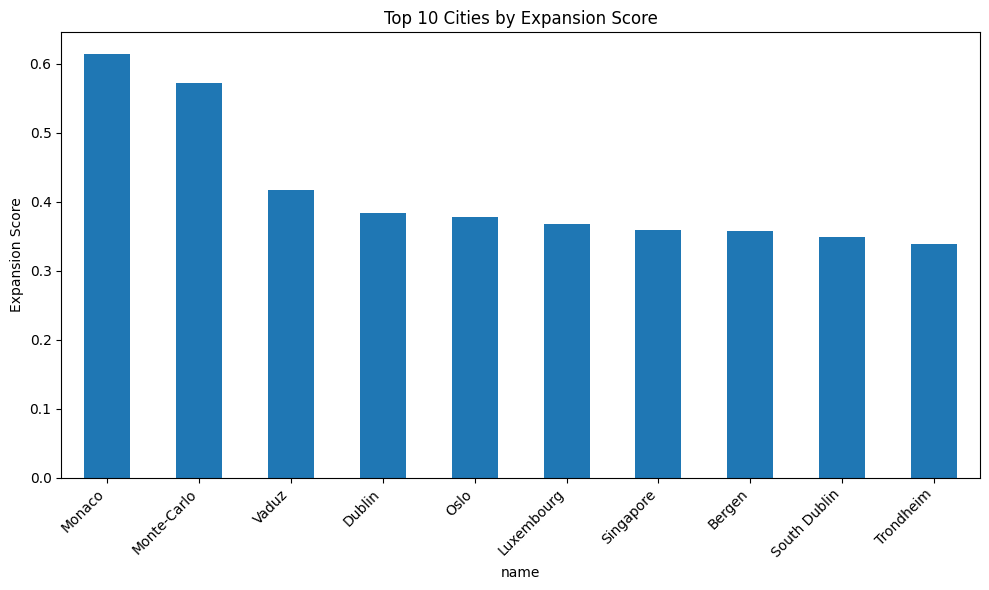

In [6]:
import matplotlib.pyplot as plt

# Sort and plot
scores = top10.set_index('name')['expansion_score']
plt.figure(figsize=(10,6))
scores.plot(kind='bar')
plt.ylabel('Expansion Score')
plt.title('Top 10 Cities by Expansion Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [7]:
import os

# Check for the file in the current directory
file_exists = os.path.exists('top10_map.html')
print(f"top10_map.html exists: {file_exists}")

# (Optional) List all HTML files
print("HTML files in the folder:", [f for f in os.listdir('.') if f.endswith('.html')])


top10_map.html exists: True
HTML files in the folder: ['top10_map.html']
